In [1]:
import pandas as pd   # For data manipulations
import numpy as np    # For maths
import igraph as ig   # For networks 
import openai        # AI implementations
from dotenv import load_dotenv
import os
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import igraph as ig
import hashlib
# adaptado de chat gpt 
def adjustcolor(color_name, alpha):
    # Convertir nombre de color a RGB
    rgb = mcolors.CSS4_COLORS.get(color_name)
    if rgb is None:
        raise ValueError(f"El color '{color_name}' no es válido.")
    
    # Convertir RGB a hexadecimal
    r, g, b = mcolors.to_rgb(rgb)
    hex_color = f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
    
    # Agregar canal alpha
    return f'{hex_color}{int(255 * alpha):02x}'

def get_color(integer, alpha=1.0):
    # Convert the integer to a unique string using hashing
    hash_object = hashlib.sha256(str(integer).encode())
    hex_dig = hash_object.hexdigest()
    # Convert the hexadecimal hash to RGB values
    r = int(hex_dig[:2], 16) % 256
    g = int(hex_dig[2:4], 16) % 256
    b = int(hex_dig[4:6], 16) % 256
    # Format RGB values into a color string
    color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    # Return RGB values and alpha
    return (r / 255, g / 255, b / 255, alpha)
def get_colors_for_list(integer_list, alpha=1.0):
    colors = []
    for integer in integer_list:
        color = get_color(integer, alpha=alpha)
        colors.append(color)
    return colors

In [2]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/General'
# Norte de santander
os.chdir(directorio_trabajo)

In [3]:
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

,word,cluster,eigen
0,batallón,5,1.000000e+00
5,comandante,10,8.272051e-01
268,sé,10,7.443664e-01
42,información,23,7.040424e-01
28,pronto,23,6.821442e-01
...,...,...,...
624,políticos,25,2.447299e-12
1836,john,20,1.225668e-12
601,alexander,20,2.586776e-14
782,freddy,20,2.586685e-14


In [4]:
edges

,Node1,Node2
0,batallón,comandante
1,brigada,comandante
2,especial,grupo
3,operacionales,resultados
4,operaciones,orden
...,...,...
6591,soldado,ángel
6592,área,difícil
6593,área,estratégica
6594,área,soldado


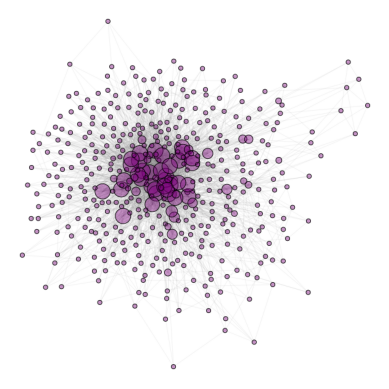

In [5]:
# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

coreness_values = g.coreness()

# Crear una lista de nodos que cumplen con la condición coreness < 115
# En este caso, asumo que los valores de coreness son más pequeños, 
# así que ajusta según tu caso.
# Este filtro puede variar dependiendo del tamaño de los valores de coreness en tu grafo.
nodes_to_include = [v.index for v in g.vs if coreness_values[v.index] > 3]

# Crear el subgrafo inducido
g = g.subgraph(nodes_to_include)
l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.1),
        vertex_label_cex=1,
        #vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.8),
        vertex_color=adjustcolor('purple',0.4),
        vertex_label_dist=0.5,
        vertex_size = [
    25 if b / max(betweenness) * 500 > 25 else (b / max(betweenness) * 500 if b / max(betweenness) * 500 > 7 else 7)
    for b in betweenness],
        layout=l)
grafico.save("General.kcore.png")
# Lee la imagen
image = plt.imread("General.kcore.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

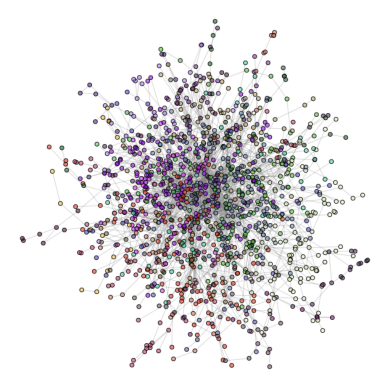

In [6]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/Antioquia'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.35),
        vertex_label_cex=1,
        vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.55),
        #vertex_color=adjustcolor('purple',0.4),
        #vertex_label_dist=0.5,
        vertex_size =6.5,
        layout=l)
grafico.save("Antioquia.png")
# Lee la imagen
image = plt.imread("Antioquia.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

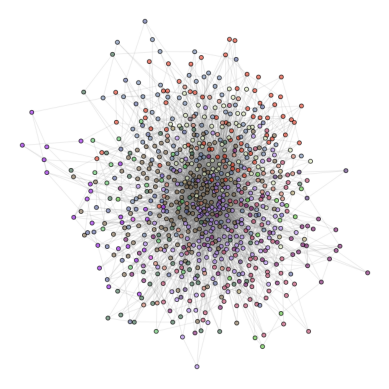

In [7]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/Huila'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

coreness_values = g.coreness()


nodes_to_include = [v.index for v in g.vs if coreness_values[v.index] > 2]

# Crear el subgrafo inducido
g = g.subgraph(nodes_to_include)

l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.2),
        vertex_label_cex=1,
        vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.55),
        #vertex_color=adjustcolor('purple',0.4),
        vertex_label_dist=0.5,
        vertex_size = 6.5,
        layout=l)
grafico.save("Huila.png")
# Lee la imagen
image = plt.imread("Huila.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

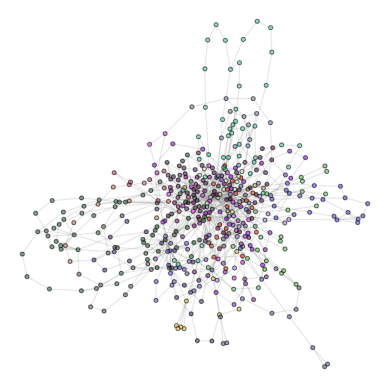

In [8]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/Meta'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

coreness_values = g.coreness()


nodes_to_include = [v.index for v in g.vs if coreness_values[v.index] > 1]

g = g.subgraph(nodes_to_include)
# Crear el subgrafo inducido
l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.35),
        vertex_label_cex=1,
        vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.55),
        #vertex_color=adjustcolor('purple',0.4),
        vertex_label_dist=0.5,
        vertex_size = 6.5,
        layout=l)
grafico.save("Meta.png")
# Lee la imagen
image = plt.imread("Meta.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

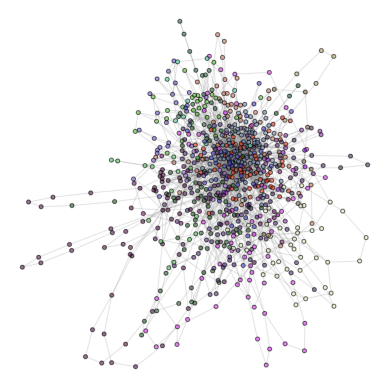

In [9]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/Casanare'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

coreness_values = g.coreness()


nodes_to_include = [v.index for v in g.vs if coreness_values[v.index] > 1]

g = g.subgraph(nodes_to_include)
l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.35),
        vertex_label_cex=1,
        vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.55),
        #vertex_color=adjustcolor('purple',0.4),
        vertex_label_dist=0.5,
        vertex_size =6.5,
        layout=l)
grafico.save("Casanare.png")
# Lee la imagen
image = plt.imread("Casanare.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

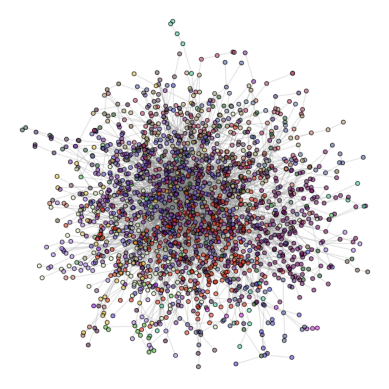

In [11]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/Costa Caribe'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value


l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.35),
        vertex_label_cex=1,
        vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.55),
        #vertex_color=adjustcolor('purple',0.4),
        vertex_label_dist=0.5,
        vertex_size = 6.5,
        layout=l)
grafico.save("Costa Caribe.png")
# Lee la imagen
image = plt.imread("Costa Caribe.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

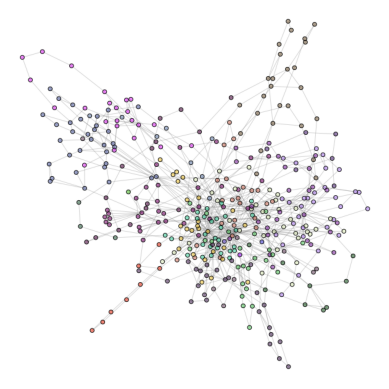

In [12]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Bigrams/Norte de santander'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido



# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso
coreness_values = g.coreness()

# Crear una lista de nodos que cumplen con la condición coreness < 115
# En este caso, asumo que los valores de coreness son más pequeños, 
# así que ajusta según tu caso.
# Este filtro puede variar dependiendo del tamaño de los valores de coreness en tu grafo.
nodes_to_include = [v.index for v in g.vs if coreness_values[v.index] >1]

# Crear el subgrafo inducido
g = g.subgraph(nodes_to_include)
l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
# Grafica el grafo con las etiquetas
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.35),
        vertex_label_cex=1,
        vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.55),
        #vertex_color=adjustcolor('purple',0.4),
        vertex_label_dist=0.5,
        vertex_size = 6.5,
        layout=l)
grafico.save("Norte de santander.png")
# Lee la imagen
image = plt.imread("Norte de santander.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

In [13]:
directorio_trabajo = r'C:/Users/Pc/Desktop/-Proyecto-JEP-/Outputs/Skipgrams/General'
# Norte de santander
os.chdir(directorio_trabajo)
edges = pd.read_csv('edges.txt', header=None, sep="\s+", names=["Node1", "Node2"])
clusters = pd.read_csv('clusters_jep.txt')
clusters=clusters.sort_values(by='eigen', ascending=False)
clusters

edges 

,Node1,Node2
0,batallón,comandante
1,justicia,militar
2,combate,presentadas
3,batallón,brigada
4,batallón,número
...,...,...
4719,área,hacían
4720,batallón,áreas
4721,grupo,época
4722,militar,época


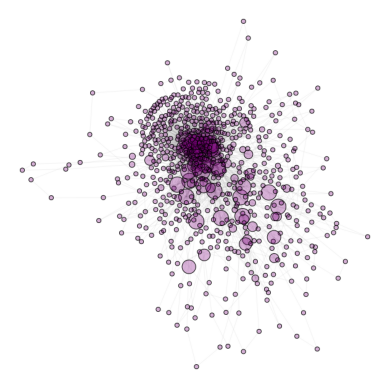

In [14]:

# Convertir el DataFrame de aristas a una lista de tuplas
edge_list = list(edges.itertuples(index=False, name=None))

# Crear el grafo a partir de las aristas
g = ig.Graph.TupleList(edge_list, directed=False)  # Usar 'directed=False' si el grafo es no dirigido

# Crear el grafo a partir de las aristas (asumiendo que ya tienes el grafo `g`)
# g = ig.Graph.TupleList(edge_list, directed=False)  # Si aún no has creado el grafo, sigue este paso

coreness_values = g.coreness()

# Asignar los clusters a los nodos del grafo
for i, row in clusters.iterrows():
    node_name = row['word']
    cluster_value = row['cluster']
    
    # Asignar el cluster al nodo correspondiente
    node_index = g.vs.find(name=node_name).index
    g.vs[node_index]['cluster'] = cluster_value

nodes_to_include = [v.index for v in g.vs if coreness_values[v.index] > 1]

# Crear el subgrafo inducido
g = g.subgraph(nodes_to_include)
l=g.layout_fruchterman_reingold()
#mds
betweenness=g.betweenness()
grafico=ig.plot(g,
        background=None,
        edge_color=adjustcolor('gray', 0.1),
        vertex_label_cex=1,
        #vertex_color=get_colors_for_list( g.vs['cluster'], alpha=0.8),
        vertex_color=adjustcolor('purple',0.3),
        vertex_label_dist=0.5,
        vertex_size = [
    25 if b / max(betweenness) * 500 > 25 else (b / max(betweenness) * 500 if b / max(betweenness) * 500 > 7 else 7)
    for b in betweenness],
        layout=l)
grafico.save("General.kcore.Skip.png")
image = plt.imread("General.kcore.Skip.png")
# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()